## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  50.782494  1581.487223  0.958403  10.304117  1.449231
1  42.113731   366.129281  0.562981   1.619903  1.239895
2  91.707373  1253.303317  0.507113   3.338542  1.479626
3  77.722352   498.340186  0.578536   2.345022  1.368673
4  37.493650   223.886443  0.356198   7.933895  1.288148


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0606880	total: 58ms	remaining: 58s
1:	learn: 1.0508557	total: 58.6ms	remaining: 29.2s
2:	learn: 1.0402107	total: 59.6ms	remaining: 19.8s
3:	learn: 1.0306174	total: 60ms	remaining: 14.9s
4:	learn: 1.0202849	total: 60.7ms	remaining: 12.1s
5:	learn: 1.0119926	total: 61.3ms	remaining: 10.2s
6:	learn: 1.0017759	total: 61.9ms	remaining: 8.78s
7:	learn: 0.9906677	total: 62.5ms	remaining: 7.75s
8:	learn: 0.9817395	total: 63ms	remaining: 6.94s
9:	learn: 0.9722586	total: 63.5ms	remaining: 6.29s
10:	learn: 0.9622233	total: 64ms	remaining: 5.75s
11:	learn: 0.9520671	total: 64.4ms	remaining: 5.3s
12:	learn: 0.9432875	total: 64.9ms	remaining: 4.92s
13:	learn: 0.9339206	total: 65.3ms	remaining: 4.6s
14:	learn: 0.9253179	total: 65.8ms	remaining: 4.32s
15:	learn: 0.9164371	total: 66.2ms	remaining: 4.07s
16:	learn: 0.9075826	total: 66.6ms	remaining: 3.85s
17:	learn: 0.8987184	total: 67ms	remaining: 3.66s
18:	learn: 0.8922299	total: 67.5ms	remaining: 3.48s
19:	le

112:	learn: 0.4379589	total: 107ms	remaining: 837ms
113:	learn: 0.4357673	total: 107ms	remaining: 833ms
114:	learn: 0.4328141	total: 108ms	remaining: 829ms
115:	learn: 0.4300118	total: 108ms	remaining: 824ms
116:	learn: 0.4270768	total: 108ms	remaining: 819ms
117:	learn: 0.4245504	total: 109ms	remaining: 813ms
118:	learn: 0.4222844	total: 109ms	remaining: 808ms
119:	learn: 0.4199730	total: 109ms	remaining: 803ms
120:	learn: 0.4171532	total: 110ms	remaining: 797ms
121:	learn: 0.4140668	total: 110ms	remaining: 793ms
122:	learn: 0.4115664	total: 111ms	remaining: 788ms
123:	learn: 0.4095150	total: 111ms	remaining: 784ms
124:	learn: 0.4068621	total: 112ms	remaining: 785ms
125:	learn: 0.4042850	total: 112ms	remaining: 780ms
126:	learn: 0.4014627	total: 113ms	remaining: 776ms
127:	learn: 0.3991396	total: 113ms	remaining: 773ms
128:	learn: 0.3966614	total: 114ms	remaining: 768ms
129:	learn: 0.3943705	total: 114ms	remaining: 764ms
130:	learn: 0.3920744	total: 115ms	remaining: 760ms
131:	learn: 

293:	learn: 0.2013244	total: 185ms	remaining: 444ms
294:	learn: 0.2005031	total: 186ms	remaining: 443ms
295:	learn: 0.1993306	total: 186ms	remaining: 442ms
296:	learn: 0.1981174	total: 187ms	remaining: 442ms
297:	learn: 0.1969890	total: 187ms	remaining: 440ms
298:	learn: 0.1966368	total: 187ms	remaining: 439ms
299:	learn: 0.1961137	total: 188ms	remaining: 438ms
300:	learn: 0.1957947	total: 188ms	remaining: 437ms
301:	learn: 0.1951137	total: 188ms	remaining: 436ms
302:	learn: 0.1948077	total: 189ms	remaining: 434ms
303:	learn: 0.1938361	total: 189ms	remaining: 433ms
304:	learn: 0.1928605	total: 190ms	remaining: 432ms
305:	learn: 0.1921903	total: 190ms	remaining: 431ms
306:	learn: 0.1918075	total: 191ms	remaining: 430ms
307:	learn: 0.1908367	total: 191ms	remaining: 429ms
308:	learn: 0.1897406	total: 192ms	remaining: 429ms
309:	learn: 0.1884924	total: 192ms	remaining: 427ms
310:	learn: 0.1875752	total: 192ms	remaining: 426ms
311:	learn: 0.1870446	total: 193ms	remaining: 425ms
312:	learn: 

526:	learn: 0.0968693	total: 288ms	remaining: 259ms
527:	learn: 0.0966162	total: 289ms	remaining: 258ms
528:	learn: 0.0962170	total: 289ms	remaining: 258ms
529:	learn: 0.0959714	total: 290ms	remaining: 257ms
530:	learn: 0.0958199	total: 290ms	remaining: 256ms
531:	learn: 0.0954853	total: 291ms	remaining: 256ms
532:	learn: 0.0953379	total: 291ms	remaining: 255ms
533:	learn: 0.0950110	total: 291ms	remaining: 254ms
534:	learn: 0.0948028	total: 292ms	remaining: 254ms
535:	learn: 0.0945984	total: 292ms	remaining: 253ms
536:	learn: 0.0940152	total: 293ms	remaining: 253ms
537:	learn: 0.0936740	total: 293ms	remaining: 252ms
538:	learn: 0.0934065	total: 294ms	remaining: 251ms
539:	learn: 0.0928365	total: 294ms	remaining: 251ms
540:	learn: 0.0926239	total: 295ms	remaining: 250ms
541:	learn: 0.0922562	total: 295ms	remaining: 249ms
542:	learn: 0.0916984	total: 296ms	remaining: 249ms
543:	learn: 0.0913902	total: 296ms	remaining: 248ms
544:	learn: 0.0910296	total: 296ms	remaining: 248ms
545:	learn: 

703:	learn: 0.0547613	total: 366ms	remaining: 154ms
704:	learn: 0.0546078	total: 367ms	remaining: 154ms
705:	learn: 0.0543525	total: 367ms	remaining: 153ms
706:	learn: 0.0542430	total: 368ms	remaining: 152ms
707:	learn: 0.0539930	total: 368ms	remaining: 152ms
708:	learn: 0.0539203	total: 369ms	remaining: 151ms
709:	learn: 0.0538492	total: 369ms	remaining: 151ms
710:	learn: 0.0536833	total: 369ms	remaining: 150ms
711:	learn: 0.0535340	total: 370ms	remaining: 150ms
712:	learn: 0.0534281	total: 370ms	remaining: 149ms
713:	learn: 0.0533586	total: 371ms	remaining: 148ms
714:	learn: 0.0531151	total: 371ms	remaining: 148ms
715:	learn: 0.0530472	total: 372ms	remaining: 147ms
716:	learn: 0.0527941	total: 372ms	remaining: 147ms
717:	learn: 0.0527555	total: 372ms	remaining: 146ms
718:	learn: 0.0525182	total: 373ms	remaining: 146ms
719:	learn: 0.0522946	total: 373ms	remaining: 145ms
720:	learn: 0.0520488	total: 374ms	remaining: 145ms
721:	learn: 0.0519064	total: 374ms	remaining: 144ms
722:	learn: 

946:	learn: 0.0277833	total: 470ms	remaining: 26.3ms
947:	learn: 0.0277436	total: 471ms	remaining: 25.8ms
948:	learn: 0.0276526	total: 471ms	remaining: 25.3ms
949:	learn: 0.0276159	total: 472ms	remaining: 24.8ms
950:	learn: 0.0274467	total: 472ms	remaining: 24.3ms
951:	learn: 0.0274305	total: 472ms	remaining: 23.8ms
952:	learn: 0.0274147	total: 473ms	remaining: 23.3ms
953:	learn: 0.0273993	total: 473ms	remaining: 22.8ms
954:	learn: 0.0273693	total: 473ms	remaining: 22.3ms
955:	learn: 0.0273543	total: 474ms	remaining: 21.8ms
956:	learn: 0.0273371	total: 474ms	remaining: 21.3ms
957:	learn: 0.0272755	total: 474ms	remaining: 20.8ms
958:	learn: 0.0272462	total: 475ms	remaining: 20.3ms
959:	learn: 0.0272292	total: 475ms	remaining: 19.8ms
960:	learn: 0.0271688	total: 476ms	remaining: 19.3ms
961:	learn: 0.0271543	total: 476ms	remaining: 18.8ms
962:	learn: 0.0270950	total: 477ms	remaining: 18.3ms
963:	learn: 0.0270784	total: 477ms	remaining: 17.8ms
964:	learn: 0.0270201	total: 478ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

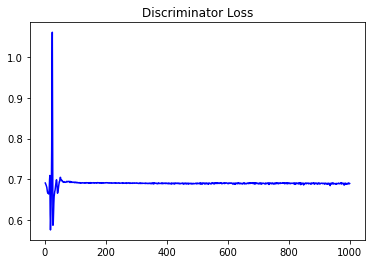

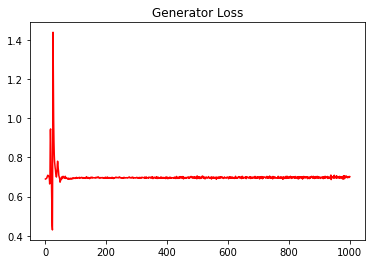

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.39185908135132547


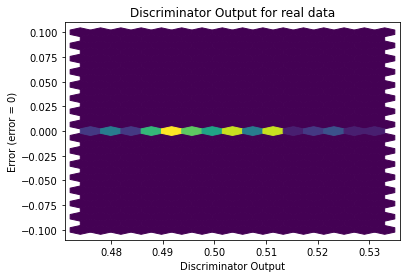

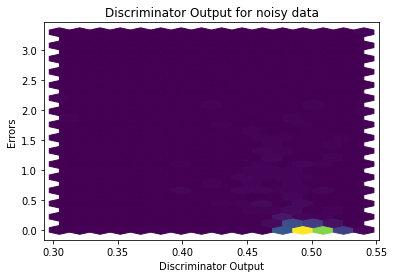

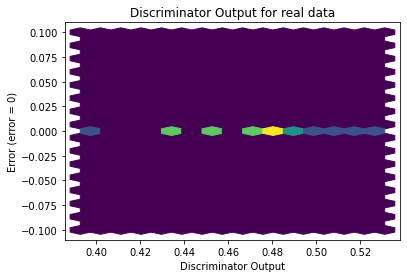

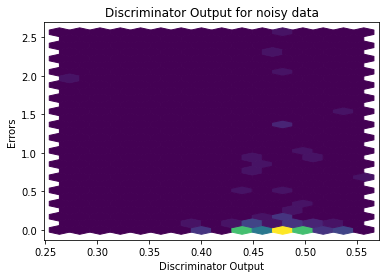

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


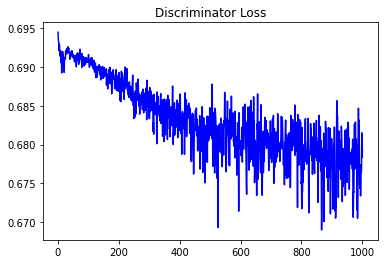

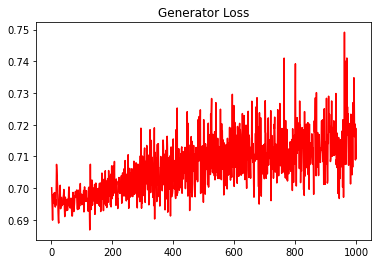

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.4325088499257036


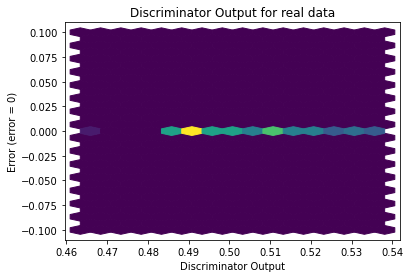

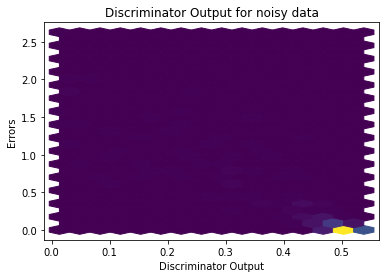

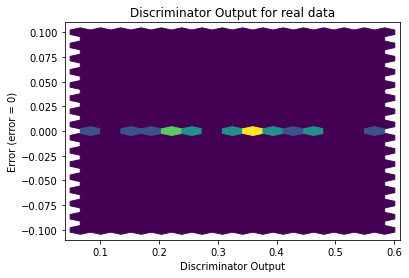

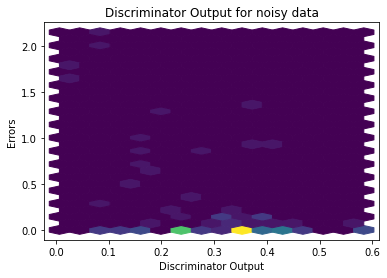

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5471]], requires_grad=True)
